In [2]:
import pandas as pd
import numpy as np

In [3]:
!ls Data/TheBeatle

ADayInTheLife.txt            HeyJude.txt
ComeTogether.txt             IWantToHoldYourHand.txt
DontLetMeDown.txt            LoveMeDo.txt
EleanorRigby.txt             Something.txt
Help.txt                     WhileMyGuitarGentlyWeeps.txt


In [4]:
#Load the data
import glob
TheBeatle=glob.glob("Data/TheBeatle/*.txt")
TaylorSwift=glob.glob("Data/TaylorSwift/*.txt")
filenames=TheBeatle+TaylorSwift
filenames

['Data/TheBeatle/LoveMeDo.txt',
 'Data/TheBeatle/IWantToHoldYourHand.txt',
 'Data/TheBeatle/WhileMyGuitarGentlyWeeps.txt',
 'Data/TheBeatle/ComeTogether.txt',
 'Data/TheBeatle/Something.txt',
 'Data/TheBeatle/EleanorRigby.txt',
 'Data/TheBeatle/ADayInTheLife.txt',
 'Data/TheBeatle/DontLetMeDown.txt',
 'Data/TheBeatle/Help.txt',
 'Data/TheBeatle/HeyJude.txt',
 'Data/TaylorSwift/BadBlood.txt',
 'Data/TaylorSwift/YouNeedToCalmDown.txt',
 'Data/TaylorSwift/Delicate.txt',
 'Data/TaylorSwift/TheMan.txt',
 'Data/TaylorSwift/YouBelongWithMe.txt',
 'Data/TaylorSwift/SoonYouWillGetBetter.txt',
 'Data/TaylorSwift/LookWhatYouMakeMeDo.txt',
 'Data/TaylorSwift/Me!.txt',
 'Data/TaylorSwift/LoveStory.txt',
 'Data/TaylorSwift/22.txt']

In [5]:
#Open the test_song
with open('Data/TheBeatle/HeyJude.txt') as f:
    test_song = f.readlines()
    test_song = test_song[:4]
    print(test_song)

["Hey Jude, don't make it bad\n", 'Take a sad song and make it better\n', 'Remember to let her into your heart\n', 'Then you can start to make it better\n']


In [6]:
with open('Data/TaylorSwift/YouNeedToCalmDown.txt') as f:
    test_song = f.readlines()
    test_song = test_song
    print(test_song)

["You are somebody that I don't know\n", "But you're takin' shots at me like it's Patrón\n", "And I'm just like, damn, it's 7 AM\n", "Say it in the street, that's a knock-out\n", "But you say it in a Tweet, that's a cop-out\n", 'And I\'m just like, "Hey, are you okay?"\n', "And I ain't tryna mess with your self-expression\n", "But I've learned a lesson that stressin' and obsessin' 'bout somebody else is no fun\n", 'And snakes and stones never broke my bones\n', 'So oh-oh, oh-oh, oh-oh, oh-oh, oh-oh\n', "You need to calm down, you're being too loud\n", "And I'm just like oh-oh, oh-oh, oh-oh, oh-oh, oh-oh (oh)\n", 'You need to just stop\n', 'Like can you just not step on my gown?\n', 'You need to calm down\n', "You are somebody that we don't know\n", "But you're comin' at my friends like a missile\n", 'Why are you mad?\n', 'When you could be GLAAD? (You could be GLAAD)\n', 'Sunshine on the street at the parade\n', 'But you would rather be in the dark age\n', "Just makin' that sign must'v

## 1) Filtering and Cleaning

In [7]:
import string
punctuations = list(string.punctuation)
punctuations.remove("'") #Not include the apostrophe
punctuations+="\n"
def clean_song(song):
    cleaned = []
    for line in song:
        for symbol in punctuations:
            line = line.replace(symbol, '').lower()
        cleaned.append(line)
    return cleaned

clean_song(test_song)[:4]

["you are somebody that i don't know",
 "but you're takin' shots at me like it's patrón",
 "and i'm just like damn it's 7 am",
 "say it in the street that's a knockout"]

### Tokenization

In [8]:
from nltk import word_tokenize
sentence= "I'm dangerous. Don't underestimate!!!"
print(word_tokenize(sentence))
print(sentence.split(" "))

['I', "'m", 'dangerous', '.', 'Do', "n't", 'underestimate', '!', '!', '!']
["I'm", 'dangerous.', "Don't", 'underestimate!!!']


In [10]:
#https://stackoverflow.com/questions/35345761/python-re-split-vs-nltk-word-tokenize-and-sent-tokenize
def tokenize(song):
    joined_song = ' '.join(song) #Join sentences together
    tokenized_song = word_tokenize(joined_song)
    return tokenized_song

tokenize(test_song)

['You',
 'are',
 'somebody',
 'that',
 'I',
 'do',
 "n't",
 'know',
 'But',
 'you',
 "'re",
 'takin',
 "'",
 'shots',
 'at',
 'me',
 'like',
 'it',
 "'s",
 'Patrón',
 'And',
 'I',
 "'m",
 'just',
 'like',
 ',',
 'damn',
 ',',
 'it',
 "'s",
 '7',
 'AM',
 'Say',
 'it',
 'in',
 'the',
 'street',
 ',',
 'that',
 "'s",
 'a',
 'knock-out',
 'But',
 'you',
 'say',
 'it',
 'in',
 'a',
 'Tweet',
 ',',
 'that',
 "'s",
 'a',
 'cop-out',
 'And',
 'I',
 "'m",
 'just',
 'like',
 ',',
 '``',
 'Hey',
 ',',
 'are',
 'you',
 'okay',
 '?',
 "''",
 'And',
 'I',
 'ai',
 "n't",
 'tryna',
 'mess',
 'with',
 'your',
 'self-expression',
 'But',
 'I',
 "'ve",
 'learned',
 'a',
 'lesson',
 'that',
 'stressin',
 "'",
 'and',
 'obsessin',
 "'",
 "'bout",
 'somebody',
 'else',
 'is',
 'no',
 'fun',
 'And',
 'snakes',
 'and',
 'stones',
 'never',
 'broke',
 'my',
 'bones',
 'So',
 'oh-oh',
 ',',
 'oh-oh',
 ',',
 'oh-oh',
 ',',
 'oh-oh',
 ',',
 'oh-oh',
 'You',
 'need',
 'to',
 'calm',
 'down',
 ',',
 'you',
 "'re",


### Stemming, Lemmatization, and Stopwords

In [11]:
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 
   
ps = PorterStemmer() 
lemmatizer = WordNetLemmatizer()
# choose some words to be stemmed 
words = ["takin'", "knock-out", "don't", "dangerous","working", "apples", 'better', 'died' ] 
  
for w in words: 
    print(w,":", ps.stem(w),lemmatizer.lemmatize(w,pos ="v"))

takin' : takin' takin'
knock-out : knock-out knock-out
don't : don't don't
dangerous : danger dangerous
working : work work
apples : appl apples
better : better better
died : die die


In [12]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(len(stopwords_list))
print(stopwords_list[:10])
print(stopwords_list[35:45])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am']


In [350]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords_list = stopwords.words('english')
stopwords_list=stopwords_list[35:]
stopwords_list+=["n't", "it", "'s","'m", "'re","'"]
lemmatizer = WordNetLemmatizer()
def lemmatize_remove_stopwords(tokenize_list):
    lemmatized_words=[]
    for w in tokenize_list:
        w=lemmatizer.lemmatize(w,pos ="a")
        w=lemmatizer.lemmatize(w,pos ="n")
        w=lemmatizer.lemmatize(w,pos ="v")
        lemmatized_words.append(w)
    song_noStopword = [i for i in lemmatized_words if i not in stopwords_list]
    return song_noStopword

print(lemmatize_remove_stopwords(tokenize(test_song))[:23])

['You', 'somebody', 'I', 'know', 'But', 'you', 'takin', 'shoot', 'me', 'like', 'Patrón', 'And', 'I', 'like', ',', 'damn', ',', '7', 'AM', 'Say', 'street', ',', 'knock-out']


### Vectorize and frequency

In [23]:
def vectorize_and_freq(song, vocab=None):
    
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(song))
    #initial bag of word dictionary
    song_dict = {i:0 for i in unique_words} 
    
    for word in song:
        song_dict[word] += 1
    
    return song_dict


In [30]:
output_=lemmatize_remove_stopwords(tokenize(test_song))
output_=vectorize_and_freq(output_)
print(list(output_.items())[:10])

[('le', 1), ('But', 6), ('okay', 1), ('bone', 1), ('calm', 8), ('When', 1), ('must', 1), ('your', 2), ('see', 1), ('like', 7)]


## Term frequency - Inverse Document Frequency (TF-IDF)

$$\text{TF-IDF}=\text{TF}\times \text{IDF}$$

### Term frequency

$$\text{TF }(t) = \frac{\text{number of times t appears in a document}} {\text{total number of terms in the document}} $$

In [35]:

def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [36]:
output_=clean_song(test_song)
output_=tokenize(output_)
output_=lemmatize_remove_stopwords(output_)
output_=vectorize_and_freq(output_)
ouput_=term_frequency(output_)

ouput_=sorted(ouput_.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

for i in ouput_[:10]:
    print(i)

('you', 0.1542056074766355)
('ohoh', 0.14018691588785046)
('need', 0.056074766355140186)
('like', 0.04672897196261682)
('i', 0.037383177570093455)
('calm', 0.037383177570093455)
('we', 0.02336448598130841)
('stop', 0.018691588785046728)
('loud', 0.018691588785046728)
('step', 0.014018691588785047)


### Inverse Document Frequency

$$\text{IDF}(t) =  log_e \left ( \frac{\text{Total Number of Documents}}{\text{Number of Documents with t in it}} \right ) $$

In [37]:
def inverse_document_frequency(dicts_list):
    #0 : Totoal Number of Document
    num_doc=len(dicts_list)
    
    #1: Find all the unique words for all the document
    vocab_set=[]
    for d in dicts_list:
        for word in d.keys():
            vocab_set.append(word)
    vocab_set=set(vocab_set)
    
    #2: Number of document with t in it
    idf_t = {i:0 for i in vocab_set} #
    
    for word in idf_t.keys():
        docs = 0
        # Find number of doc for each word
        for d in dicts_list:
            if word in d:
                docs += 1
        
        # Compute idf for each t
        idf_t[word] = np.log((num_doc/ float(docs)))
    
    return idf_t

In [38]:
def tf_idf(dicts_list):
    # Vocab for corpus
    doc_tf_idf = {}
    idf = inverse_document_frequency(dicts_list)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in dicts_list:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    return tf_idf_list_of_dicts

In [39]:
def main(filenames):
    # Iterate through list of filenames and read each in
    cvad = [] #count vectorized all documents
    for file in filenames:
        with open(file) as f:
            raw_data = f.readlines()
        # Clean and tokenize raw text
        ouput_ = clean_song(raw_data)
        ouput_ = tokenize(ouput_)
        ouput_=lemmatize_remove_stopwords(ouput_)  
        ouput_ = vectorize_and_freq(ouput_)
        cvad.append(ouput_)
    # tf-idf representation of everything
    tf_idf_all_docs = tf_idf(cvad)
    
    return tf_idf_all_docs
tf_idf_all_docs = main(filenames)
print("Number of Dimensions: {}".format(len(tf_idf_all_docs[12])))
for key, value in list(tf_idf_all_docs[15].items())[20:25]:
    print(key,value)

Number of Dimensions: 714
want 0.015178405413721431
ca 0.007717774386704719
something 0.006311521225231766
happy 0.016807190459810554
touch 0.008591735421619574


In [51]:
#Reduce dimentionality
tf_idf_vals_list = []

tf_idf_vals_list= [list(i.values()) for i in tf_idf_all_docs]
    


## Visualization

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

np.random.seed(4)
tf_idf_all_docs = main(filenames)
tf_idf_vals_list= [list(i.values()) for i in tf_idf_all_docs] 
TSNE_2d = TSNE(n_components=2)
data_2d = TSNE_2d.fit_transform(tf_idf_vals_list)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
np.random.seed(10)

tf_idf_all_docs = main(filenames) 
TSNE_2d = TSNE(n_components=2)
data_2d = TSNE_2d.fit_transform(tf_idf_vals_list)

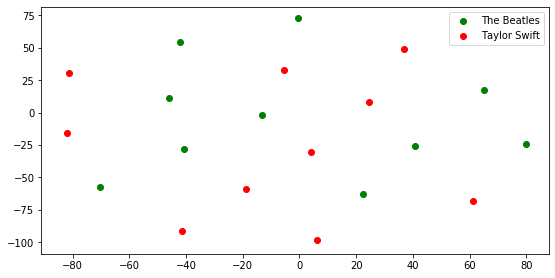

In [67]:
TheBeatle = data_2d[:10]
beatle_x = [i[0] for i in TheBeatle]
beatle_y = [i[1] for i in TheBeatle]

TaylorSwift = data_2d[10:]
ts_x = [i[0] for i in TaylorSwift]
ts_y = [i[1] for i in TaylorSwift]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(beatle_x, beatle_y, color='g', label='The Beatles')
ax.scatter(ts_x, ts_y, color='r', label='Taylor Swift')
ax.legend()
plt.show()